In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/shivang98/Social-Network-ads-Boost/master/Social_Network_Ads.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Sex']= le.fit_transform(df['Gender'])
df.drop(['Gender'], inplace = True, axis = 1)

In [5]:
df

,User ID,Age,EstimatedSalary,Purchased,Sex
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [13]:
X = df.drop(['User ID','Purchased'], axis = 1)
Y = df['Purchased']
X


,Age,EstimatedSalary,Sex
0,19,19000,1
1,35,20000,1
2,26,43000,0
3,27,57000,0
4,19,76000,1
...,...,...,...
395,46,41000,0
396,51,23000,1
397,50,20000,0
398,36,33000,1


In [14]:
Y


0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [21]:
X

,Age,EstimatedSalary,Sex
0,0.023810,0.029630,1.0
1,0.404762,0.037037,1.0
2,0.190476,0.207407,0.0
3,0.214286,0.311111,0.0
4,0.023810,0.451852,1.0
...,...,...,...
395,0.666667,0.192593,0.0
396,0.785714,0.059259,1.0
397,0.761905,0.037037,0.0
398,0.428571,0.133333,1.0


In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(X,Y, test_size =0.2, random_state =0)


In [23]:
model = LogisticRegression()
model.fit(xtrain, ytrain)

LogisticRegression()

In [24]:
model.score(xtest, ytest)

0.925

In [25]:
ypredict = model.predict(xtest)

In [26]:
cm = confusion_matrix(ytest, ypredict)

In [27]:
cm

array([[58,  0],
       [ 6, 16]])

<AxesSubplot:>

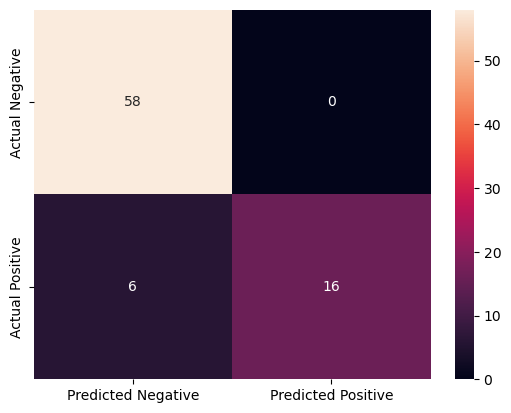

In [28]:
sns.heatmap(cm, annot=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])